# Skopje Air Pollution

## Introduction

The city of Skopje is well known for its struggles with poor air quality, especially in the winter months. The main pollutants are CO, NO2, ozone, and particulate matter of different dimensions.

Monitoring stations for measuring the concentrations of each of the main pollutants have been installed in different locations around the city.

## Import Libraries
Before we begin, let us import the libraries that we will be using (Pandas, matplotlib and seaborn). Any additional libraries that we decide to import we will add in this cell.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Dataset
The following data has been taken from kaggle (https://www.kaggle.com/datasets/cokastefan/pm10-pollution-data-in-skopje-from-2008-to-2018) where data from the monitoring stations (https://air.moepp.gov.mk/?page_id=175) for the period from Janaury 2007 to December 2018 has been compiled in a single dataset. To make our task more managable, we will only be looking at data for the time period of five years, from January 2012 to December 2016.

## Import data
The data is contained in the directory CSVs in the files (CO.csv, NO2.csv, O3.csv, PM10.csv, and PM25.csv). Let's import the data from the CSV files as separate pandas dataframes.

In [2]:
# Read files into dataframes

files = ['CO.csv', 'NO2.csv', 'O3.csv', 'PM10.csv', 'PM25.csv']  # Define the list of filenames

dataframes = {}    # Create an empty dictionary to store the DataFrames

# Loop through the filenames and import the data into DataFrames
for f_name in files:
    # Construct the full file path
    file_path = f'C:/Users/slobo/Downloads/Project Templates/03 Air Pollution Scenario/CSVs/{f_name}' 

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Store the DataFrame in the dictionary with the filename as the key
    dataframes[f_name[:-4]] = df  # Remove ".csv" from filenames

# Access the individual DataFrames using the corresponding keys
df_co = dataframes['CO']
df_no2 = dataframes['NO2']
df_o3 = dataframes['O3']
df_pm10 = dataframes['PM10']
df_pm25 = dataframes['PM25']



## Review Data
Let's display each of the dataframes and look at the data types in order to get a sense of the data. Check that the data types are accurate.

In [3]:
# Display dataframes and check data types
df_co

,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Mobile,Rektorat,time
0,36212,36212,0.2876,0.9219,0.5644,NaN,NaN,NaN,0.3708,2012-01-01 00:00:00
1,36213,36213,0.1538,1.2029,0.8275,NaN,0.3858,NaN,0.4097,2012-01-01 01:00:00
2,36214,36214,0.1600,1.3198,0.7423,NaN,0.3346,NaN,0.4061,2012-01-01 02:00:00
3,36215,36215,0.1699,1.1449,0.4445,NaN,0.3549,NaN,0.6500,2012-01-01 03:00:00
4,36216,36216,0.1539,0.8092,0.5121,NaN,0.2553,NaN,0.7198,2012-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
45302,81514,81514,NaN,1.3572,0.5898,0.3828,0.5220,NaN,0.4292,2016-12-31 19:00:00
45303,81515,81515,NaN,0.9164,0.8474,2.2388,0.4060,NaN,1.8676,2016-12-31 20:00:00
45304,81516,81516,NaN,1.7400,1.3342,2.4592,0.4060,NaN,1.7632,2016-12-31 21:00:00
45305,81517,81517,NaN,3.0392,0.9611,4.4660,0.4872,NaN,2.5056,2016-12-31 22:00:00


In [4]:
df_no2

,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Mobile,Rektorat,time
0,36212,36212,27.5615,NaN,31.1979,40.2691,NaN,NaN,NaN,2012-01-01 00:00:00
1,36213,36213,16.1041,NaN,34.4904,33.3520,NaN,NaN,NaN,2012-01-01 01:00:00
2,36214,36214,2.8074,NaN,3.2517,32.6270,NaN,NaN,NaN,2012-01-01 02:00:00
3,36215,36215,2.3009,NaN,27.3558,27.2408,NaN,NaN,NaN,2012-01-01 03:00:00
4,36216,36216,20.5436,NaN,39.6147,41.2352,NaN,NaN,NaN,2012-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
45302,81514,81514,NaN,NaN,28.3310,6.1120,9.5882,NaN,35.3658,2016-12-31 19:00:00
45303,81515,81515,NaN,NaN,29.9614,11.1926,10.4286,NaN,37.2691,2016-12-31 20:00:00
45304,81516,81516,NaN,NaN,35.5054,11.8422,5.5008,NaN,39.1076,2016-12-31 21:00:00
45305,81517,81517,NaN,NaN,32.5632,14.9171,NaN,NaN,34.8592,2016-12-31 22:00:00


In [5]:
df_o3

,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Mobile,Rektorat,time
0,36212,36212,22.6658,NaN,22.7910,8.0383,NaN,NaN,7.1541,2012-01-01 00:00:00
1,36213,36213,33.9524,NaN,2.4778,10.0362,NaN,NaN,6.4485,2012-01-01 01:00:00
2,36214,36214,32.6988,NaN,15.6506,9.9571,NaN,NaN,9.1569,2012-01-01 02:00:00
3,36215,36215,31.9470,NaN,25.6524,13.4646,NaN,NaN,5.5608,2012-01-01 03:00:00
4,36216,36216,31.5400,NaN,14.6374,8.0210,NaN,NaN,8.2465,2012-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
45302,81514,81514,NaN,NaN,30.7700,34.0600,34.58,NaN,7.9279,2016-12-31 19:00:00
45303,81515,81515,NaN,NaN,39.0296,10.0400,33.06,NaN,5.9459,2016-12-31 20:00:00
45304,81516,81516,NaN,NaN,37.0228,3.7200,35.14,NaN,5.4855,2016-12-31 21:00:00
45305,81517,81517,NaN,NaN,35.2526,4.7400,34.88,NaN,6.0661,2016-12-31 22:00:00


In [6]:
df_pm10

,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Mobile,Rektorat,time
0,36212,36212,33.3369,147.0360,53.5518,51.4799,4.0717,NaN,67.7699,2012-01-01 00:00:00
1,36213,36213,22.7030,186.4710,91.0442,40.2183,17.1251,NaN,84.1200,2012-01-01 01:00:00
2,36214,36214,20.7956,176.7180,66.4194,51.9866,13.7951,NaN,77.5800,2012-01-01 02:00:00
3,36215,36215,24.9218,101.5350,49.4371,57.2999,20.7067,NaN,87.2300,2012-01-01 03:00:00
4,36216,36216,26.9868,84.2333,53.2615,53.7198,14.1101,NaN,90.7400,2012-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
45302,81514,81514,NaN,122.3900,65.5215,41.2800,63.2700,NaN,76.5900,2016-12-31 19:00:00
45303,81515,81515,NaN,136.1000,89.7657,84.6299,63.9700,NaN,173.3600,2016-12-31 20:00:00
45304,81516,81516,NaN,162.1200,109.1280,175.8600,62.9200,NaN,202.9400,2016-12-31 21:00:00
45305,81517,81517,NaN,278.6000,84.5262,190.0100,55.2900,NaN,220.9400,2016-12-31 22:00:00


In [7]:
df_pm25

,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Mobile,Rektorat,time
0,36212,36212,21.8149,NaN,39.5599,NaN,NaN,NaN,NaN,2012-01-01 00:00:00
1,36213,36213,14.4168,NaN,65.5437,NaN,NaN,NaN,NaN,2012-01-01 01:00:00
2,36214,36214,13.0873,NaN,50.5635,NaN,NaN,NaN,NaN,2012-01-01 02:00:00
3,36215,36215,16.0224,NaN,38.8961,NaN,NaN,NaN,NaN,2012-01-01 03:00:00
4,36216,36216,17.1630,NaN,39.8982,NaN,NaN,NaN,NaN,2012-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
45302,81514,81514,NaN,NaN,56.7961,NaN,NaN,NaN,NaN,2016-12-31 19:00:00
45303,81515,81515,NaN,NaN,80.1820,NaN,NaN,NaN,NaN,2016-12-31 20:00:00
45304,81516,81516,NaN,NaN,96.3556,NaN,NaN,NaN,NaN,2016-12-31 21:00:00
45305,81517,81517,NaN,NaN,70.3649,NaN,NaN,NaN,NaN,2016-12-31 22:00:00


## Data cleaning and restructuring
Because the mobile column is from a mobile monitoring station located in the municipality of Butel and occasionally displaced, we can drop that column.

We can also rename the column time to datetime and create additional separate time and date columns. 

We can add a column in each of the dataframes indicating the type of pollutant and concatenate the dataframes.

In [8]:
# Data cleaning and restructuring

dataframes = [df_co, df_no2, df_o3, df_pm10, df_pm25]
column_drop = 'Mobile'

for df in dataframes:
    df.drop(column_drop, axis=1, inplace=True)

In [9]:
df_co

,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Rektorat,time
0,36212,36212,0.2876,0.9219,0.5644,NaN,NaN,0.3708,2012-01-01 00:00:00
1,36213,36213,0.1538,1.2029,0.8275,NaN,0.3858,0.4097,2012-01-01 01:00:00
2,36214,36214,0.1600,1.3198,0.7423,NaN,0.3346,0.4061,2012-01-01 02:00:00
3,36215,36215,0.1699,1.1449,0.4445,NaN,0.3549,0.6500,2012-01-01 03:00:00
4,36216,36216,0.1539,0.8092,0.5121,NaN,0.2553,0.7198,2012-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
45302,81514,81514,NaN,1.3572,0.5898,0.3828,0.5220,0.4292,2016-12-31 19:00:00
45303,81515,81515,NaN,0.9164,0.8474,2.2388,0.4060,1.8676,2016-12-31 20:00:00
45304,81516,81516,NaN,1.7400,1.3342,2.4592,0.4060,1.7632,2016-12-31 21:00:00
45305,81517,81517,NaN,3.0392,0.9611,4.4660,0.4872,2.5056,2016-12-31 22:00:00


In [10]:
dataframes = [df_co, df_no2, df_o3, df_pm10, df_pm25]

for df in dataframes:
    
    df.rename(columns={'time': 'datetime'}, inplace=True)  # Rename 'time' column to 'datetime'
    

In [11]:
df_pm10

,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Rektorat,datetime
0,36212,36212,33.3369,147.0360,53.5518,51.4799,4.0717,67.7699,2012-01-01 00:00:00
1,36213,36213,22.7030,186.4710,91.0442,40.2183,17.1251,84.1200,2012-01-01 01:00:00
2,36214,36214,20.7956,176.7180,66.4194,51.9866,13.7951,77.5800,2012-01-01 02:00:00
3,36215,36215,24.9218,101.5350,49.4371,57.2999,20.7067,87.2300,2012-01-01 03:00:00
4,36216,36216,26.9868,84.2333,53.2615,53.7198,14.1101,90.7400,2012-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
45302,81514,81514,NaN,122.3900,65.5215,41.2800,63.2700,76.5900,2016-12-31 19:00:00
45303,81515,81515,NaN,136.1000,89.7657,84.6299,63.9700,173.3600,2016-12-31 20:00:00
45304,81516,81516,NaN,162.1200,109.1280,175.8600,62.9200,202.9400,2016-12-31 21:00:00
45305,81517,81517,NaN,278.6000,84.5262,190.0100,55.2900,220.9400,2016-12-31 22:00:00


In [12]:
for df in dataframes:
    
    df['datetime'] = pd.to_datetime(df['datetime'])  # Convert 'datetime' column to datetime type
    df['time'] = df['datetime'].dt.time  # Extract time component into 'time' column
    df['date'] = df['datetime'].dt.date  # Extract date component into 'date' column

In [13]:
df_pm10

,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Rektorat,datetime,time,date
0,36212,36212,33.3369,147.0360,53.5518,51.4799,4.0717,67.7699,2012-01-01 00:00:00,00:00:00,2012-01-01
1,36213,36213,22.7030,186.4710,91.0442,40.2183,17.1251,84.1200,2012-01-01 01:00:00,01:00:00,2012-01-01
2,36214,36214,20.7956,176.7180,66.4194,51.9866,13.7951,77.5800,2012-01-01 02:00:00,02:00:00,2012-01-01
3,36215,36215,24.9218,101.5350,49.4371,57.2999,20.7067,87.2300,2012-01-01 03:00:00,03:00:00,2012-01-01
4,36216,36216,26.9868,84.2333,53.2615,53.7198,14.1101,90.7400,2012-01-01 04:00:00,04:00:00,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...
45302,81514,81514,NaN,122.3900,65.5215,41.2800,63.2700,76.5900,2016-12-31 19:00:00,19:00:00,2016-12-31
45303,81515,81515,NaN,136.1000,89.7657,84.6299,63.9700,173.3600,2016-12-31 20:00:00,20:00:00,2016-12-31
45304,81516,81516,NaN,162.1200,109.1280,175.8600,62.9200,202.9400,2016-12-31 21:00:00,21:00:00,2016-12-31
45305,81517,81517,NaN,278.6000,84.5262,190.0100,55.2900,220.9400,2016-12-31 22:00:00,22:00:00,2016-12-31


In [14]:
dataframes = [df_co, df_no2, df_o3, df_pm10, df_pm25]
column_drop = 'datetime'

for df in dataframes:
    df.drop(column_drop, axis=1, inplace=True)

In [15]:
df_co

,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Rektorat,time,date
0,36212,36212,0.2876,0.9219,0.5644,NaN,NaN,0.3708,00:00:00,2012-01-01
1,36213,36213,0.1538,1.2029,0.8275,NaN,0.3858,0.4097,01:00:00,2012-01-01
2,36214,36214,0.1600,1.3198,0.7423,NaN,0.3346,0.4061,02:00:00,2012-01-01
3,36215,36215,0.1699,1.1449,0.4445,NaN,0.3549,0.6500,03:00:00,2012-01-01
4,36216,36216,0.1539,0.8092,0.5121,NaN,0.2553,0.7198,04:00:00,2012-01-01
...,...,...,...,...,...,...,...,...,...,...
45302,81514,81514,NaN,1.3572,0.5898,0.3828,0.5220,0.4292,19:00:00,2016-12-31
45303,81515,81515,NaN,0.9164,0.8474,2.2388,0.4060,1.8676,20:00:00,2016-12-31
45304,81516,81516,NaN,1.7400,1.3342,2.4592,0.4060,1.7632,21:00:00,2016-12-31
45305,81517,81517,NaN,3.0392,0.9611,4.4660,0.4872,2.5056,22:00:00,2016-12-31


In [16]:
dataframes = [df_co, df_no2, df_o3, df_pm10, df_pm25]

for df in dataframes:
    
    df.rename(columns={'time': 'Time'}, inplace=True) 
    df.rename(columns={'date': 'Date'}, inplace=True)  

In [17]:
# We can add a column in each of the dataframes indicating the type of pollutant and concatenate the dataframes.

dataframes = [df_co, df_no2, df_o3, df_pm10, df_pm25]
pollutants = ['CO', 'NO2', 'O3', 'PM10', 'PM25']

for i, df in enumerate(dataframes):  # Add 'pollutant' column to each DataFrame
    df['Pollutant'] = pollutants[i]

concatenated_df = pd.concat(dataframes, ignore_index=True) # Concatenate the DataFrames

In [18]:
concatenated_df

,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Rektorat,Time,Date,Pollutant
0,36212,36212,0.2876,0.9219,0.5644,NaN,NaN,0.3708,00:00:00,2012-01-01,CO
1,36213,36213,0.1538,1.2029,0.8275,NaN,0.3858,0.4097,01:00:00,2012-01-01,CO
2,36214,36214,0.1600,1.3198,0.7423,NaN,0.3346,0.4061,02:00:00,2012-01-01,CO
3,36215,36215,0.1699,1.1449,0.4445,NaN,0.3549,0.6500,03:00:00,2012-01-01,CO
4,36216,36216,0.1539,0.8092,0.5121,NaN,0.2553,0.7198,04:00:00,2012-01-01,CO
...,...,...,...,...,...,...,...,...,...,...,...
226530,81514,81514,NaN,NaN,56.7961,NaN,NaN,NaN,19:00:00,2016-12-31,PM25
226531,81515,81515,NaN,NaN,80.1820,NaN,NaN,NaN,20:00:00,2016-12-31,PM25
226532,81516,81516,NaN,NaN,96.3556,NaN,NaN,NaN,21:00:00,2016-12-31,PM25
226533,81517,81517,NaN,NaN,70.3649,NaN,NaN,NaN,22:00:00,2016-12-31,PM25


In [19]:
concatenated_df.drop(columns=[
 'Unnamed: 0.1',
 'Unnamed: 0',
 'Rektorat'
], inplace=True)


# I do not need this columns: 'Unnamed: 0.1 i Unnamed: 0';
# Column Rektorat has a lot of empty values, so I decided to drop it;

In [20]:
#concatenated_df
df = concatenated_df
df

,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Time,Date,Pollutant
0,0.2876,0.9219,0.5644,NaN,NaN,00:00:00,2012-01-01,CO
1,0.1538,1.2029,0.8275,NaN,0.3858,01:00:00,2012-01-01,CO
2,0.1600,1.3198,0.7423,NaN,0.3346,02:00:00,2012-01-01,CO
3,0.1699,1.1449,0.4445,NaN,0.3549,03:00:00,2012-01-01,CO
4,0.1539,0.8092,0.5121,NaN,0.2553,04:00:00,2012-01-01,CO
...,...,...,...,...,...,...,...,...
226530,NaN,NaN,56.7961,NaN,NaN,19:00:00,2016-12-31,PM25
226531,NaN,NaN,80.1820,NaN,NaN,20:00:00,2016-12-31,PM25
226532,NaN,NaN,96.3556,NaN,NaN,21:00:00,2016-12-31,PM25
226533,NaN,NaN,70.3649,NaN,NaN,22:00:00,2016-12-31,PM25


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataset for the time period of five years

start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2016-12-31')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Question 1
What location in Skopje has the highest average pollution for each of the pollutants? .......... (2 points)

In [22]:
locations = ['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci']

average_pollution = df.groupby('Pollutant')[locations].mean()

#print(average_pollution)
#print('-------')
# Find the location with the highest average pollution for each pollutant
highest_pollution_locations = average_pollution.idxmax(axis=1)

# Display the results
print(highest_pollution_locations) # location for each pollutant with the highest average value.

Pollutant
CO           Lisice
NO2          Centar
O3      Miladinovci
PM10         Lisice
PM25         Karpos
dtype: object


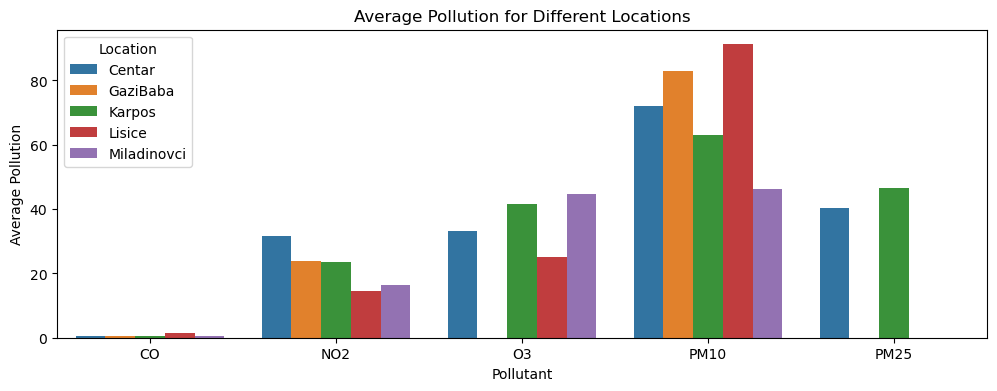

In [23]:
locations = ['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci']

average_pollution = df.groupby('Pollutant')[locations].mean()

# Reshape the data for plotting
average_pollution = average_pollution.reset_index().melt(id_vars='Pollutant', var_name='Location', value_name='Average Pollution')

plt.figure(figsize=(12,4))
sns.barplot(x='Pollutant', y='Average Pollution', hue='Location', data=average_pollution)

plt.xlabel('Pollutant')
plt.ylabel('Average Pollution')
plt.title('Average Pollution for Different Locations')
plt.legend(title='Location')

plt.show()

In [24]:
# Of the pollutants, pm10 is the most present, with the highest representation in the municipality of Lisice,
# but on the other hand CO is with the lowest representation.
# Pm25 is represented only in Karposh and Centar and moves somewhere in the middle between the lowest and highest value,
# while o3 is represented in all locations except Gazi Baba 

# Question 2
For every year, for each of the pollutants, on what time stamp is the maximum pollution for every location? What time of the year seems to have the most pollution in Skopje? .......... (2 points)

In [25]:
# For every year, for each of the pollutants, on what time stamp is the maximum pollution for every location?

df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime type

df['Year'] = df['Date'].dt.year # Extract the year from the 'Date' column

locations = ['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci']

for year in df['Year'].unique():
    print(f"Year: {year}")
    print("-----------------")
     
    year_df = df[df['Year'] == year]  # Filter the data for the current year
    
    for pollutant in year_df['Pollutant'].unique():    # Iterate over each pollutant
        print(f"Pollutant: {pollutant}")
        print("------------")
        
       
        pollutant_df = year_df[year_df['Pollutant'] == pollutant]  # Filter the data for the current pollutant
        
    
        for location in locations:   # Iterate over each location
            print(f"Location: {location}")
            
            
            location_df = pollutant_df[pollutant_df[location].notnull()]  # Filter the data for the current location
            
            if location_df.empty:     # Skip the iteration if there are no data for the location
                print("No data available for this location.")
                print()
                continue
            
            max_timestamp = location_df.loc[location_df[location].idxmax(), 'Time']   # Find the time stamp with the maximum pollution for the current location
            
            print(f"Maximum Pollution Time: {max_timestamp}")
            print()
            
        print()
    print()

# This 'print' give us informatation for the timestamp on which maximum polution has happend, 
#for every location, and for every polutant 

Year: 2012
-----------------
Pollutant: CO
------------
Location: Centar
Maximum Pollution Time: 22:00:00

Location: GaziBaba
Maximum Pollution Time: 19:00:00

Location: Karpos
Maximum Pollution Time: 18:00:00

Location: Lisice
Maximum Pollution Time: 22:00:00

Location: Miladinovci
Maximum Pollution Time: 22:00:00


Pollutant: NO2
------------
Location: Centar
Maximum Pollution Time: 11:00:00

Location: GaziBaba
Maximum Pollution Time: 14:00:00

Location: Karpos
Maximum Pollution Time: 17:00:00

Location: Lisice
Maximum Pollution Time: 13:00:00

Location: Miladinovci
No data available for this location.


Pollutant: O3
------------
Location: Centar
Maximum Pollution Time: 19:00:00

Location: GaziBaba
No data available for this location.

Location: Karpos
Maximum Pollution Time: 17:00:00

Location: Lisice
Maximum Pollution Time: 15:00:00

Location: Miladinovci
No data available for this location.


Pollutant: PM10
------------
Location: Centar
Maximum Pollution Time: 03:00:00

Location

In [26]:
# What time of the year seems to have the most pollution in Skopje? 

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month  # Extract the month from the 'Date' column

df['Month'] = df['Date'].dt.strftime('%B') # give us the month's name

average_pollution_by_month = df.groupby('Month').mean() # Calculate the average pollution for each month

most_polluted_month = average_pollution_by_month.mean(axis=1).idxmax()  # Find the month with the highest average pollution

print(f"The most polluted time of the year in Skopje is in month: {most_polluted_month}")

The most polluted time of the year in Skopje is in month: December


# Question 3
In what month of the year is the average polution accross locations highest for each of the pollutants? .......... (2 points)

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column and get the corresponding month names
df['Month'] = df['Date'].dt.strftime('%B')

# Specify the locations
locations = ['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci']

# Calculate the average pollution by month and pollutant for the specified locations
average_pollution_by_month = df.groupby(['Pollutant', 'Month'])[locations].mean()

# Find the month with the highest average pollution across locations for each pollutant
highest_pollution_months = average_pollution_by_month.groupby('Pollutant').idxmax()

print("Month with the highest average pollution across locations for each pollutant:")
print('  ')
print(highest_pollution_months)

# This gives us information about the month in which there was the highest pollution accross locations for each of the pollutant.

Month with the highest average pollution across locations for each pollutant:
  
                     Centar          GaziBaba            Karpos  \
Pollutant                                                         
CO           (CO, December)    (CO, December)    (CO, December)   
NO2         (NO2, December)   (NO2, December)   (NO2, December)   
O3               (O3, July)               NaN        (O3, July)   
PM10       (PM10, December)  (PM10, December)  (PM10, December)   
PM25       (PM25, December)               NaN  (PM25, December)   

                     Lisice      Miladinovci  
Pollutant                                     
CO           (CO, December)   (CO, December)  
NO2          (NO2, January)   (NO2, January)  
O3               (O3, July)       (O3, July)  
PM10       (PM10, December)  (PM10, January)  
PM25                    NaN              NaN  


# Question 4
What is the average pollution accross locations in every hour during the day?  .......... (2 points)

In [28]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Hour'] = df['Time'].dt.hour

locations = ['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci']
pollutants = ['CO', 'NO2', 'O3', 'PM10', 'PM25']

def calculate_aqi(concentration, breakpoints):  # AQI calculation function
    for i in range(1, len(breakpoints)):
        if breakpoints[i-1][1] <= concentration <= breakpoints[i][1]:
            aqi = ((breakpoints[i][0] - breakpoints[i-1][0]) / (breakpoints[i][1] - breakpoints[i-1][1])) * (concentration - breakpoints[i-1][1]) + breakpoints[i-1][0]
            return aqi


# Define the concentration levels and corresponding AQI breakpoints for each pollutant
breakpoints = {
    'CO': [(50, 0), (100, 4.4), (150, 9.4), (200, 12.4), (300, 15.4)],
    'NO2': [(50, 0), (100, 53), (150, 100), (200, 360), (300, 649)],
    'O3': [(50, 0), (100, 0.054), (150, 0.070), (200, 0.085), (300, 0.105)],
    'PM10': [(50, 0), (100, 54), (150, 154), (200, 254), (300, 354)],
    'PM25': [(50, 0), (100, 12), (150, 35.4), (200, 55.4), (300, 150.4)]
}

# Create a column for average AQI value for each location
for location in locations:
    df['Average_in ' + location] = None

# Iterate over each row in the DataFrame and calculate the AQI for each pollutant and location
for index, row in df.iterrows():
    pollutant = row['Pollutant']
    if pd.notna(pollutant) and pollutant in pollutants:
        for location in locations:
            concentration = row[location]
            if pd.notna(concentration):
                breakpoints_list = breakpoints[pollutant]
                aqi = calculate_aqi(concentration, breakpoints_list)
                df.at[index, 'Average_in ' + location] = aqi

# Calculate the average pollution across locations in every
average_pollution_by_hour_location = df.groupby('Hour')[['Average_in ' + location for location in locations]].mean().round(2)

print("Average pollution across locations in every hour during the day:")
print(average_pollution_by_hour_location)

#The values of the average AQI in these results range from about 70 to 105, which are the corresponding values for AQI.

Average pollution across locations in every hour during the day:
      Average_in Centar  Average_in GaziBaba  Average_in Karpos  \
Hour                                                              
0                101.81                82.43              93.60   
1                 99.94                81.25              91.84   
2                 97.87                80.23              89.85   
3                 95.31                78.66              88.61   
4                 93.93                76.79              87.17   
5                 92.76                75.49              86.90   
6                 92.94                73.72              87.43   
7                 95.22                71.39              89.09   
8                 98.80                70.43              91.39   
9                100.87                70.85              91.24   
10               100.93                71.44              90.06   
11                98.94                71.32              88.40 

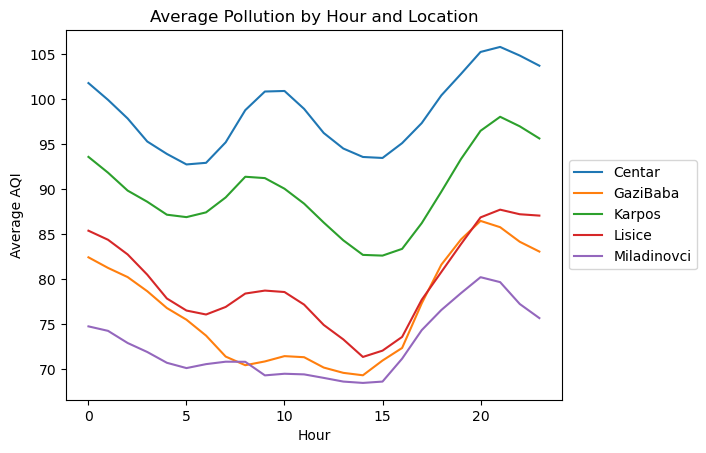

In [29]:
# Create a line plot for each location
for location in locations:
    plt.plot(average_pollution_by_hour_location.index, average_pollution_by_hour_location['Average_in ' + location], label=location)

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Average AQI')
plt.title('Average Pollution by Hour and Location')

plt.legend()

legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Plot of timetable by hours for average pollution accross locations.

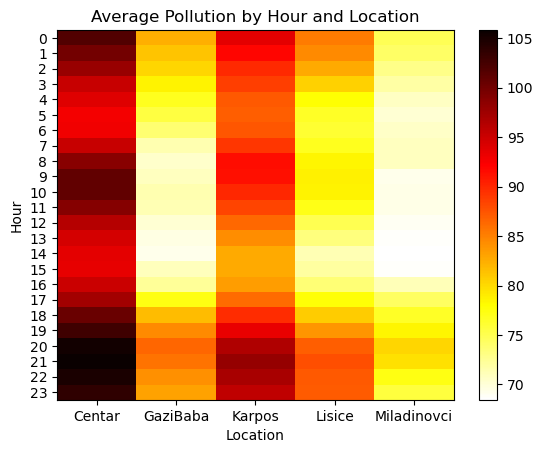

In [30]:
locations = ['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci']

average_pollution = np.zeros((24, len(locations)))  # Create a 2D array to store the average pollution values

for i, location in enumerate(locations):  # Fill the array with average pollution values
    average_pollution[:, i] = average_pollution_by_hour_location['Average_in ' + location]

plt.imshow(average_pollution, cmap='hot_r', aspect='auto')   # Create a heatmap

plt.xticks(range(len(locations)), locations)  # Set the x-axis ticks and labels

plt.yticks(range(24), range(24)) # Set the y-axis ticks and labels

plt.xlabel('Location')
plt.ylabel('Hour')
plt.title('Average Pollution by Hour and Location')

plt.colorbar()

plt.show()

# Each position in the graphic is a merge of location and time.
# The pollution value for a particular location and time is displayed with the color in the corresponding graphic position. 
# Points with dark colors indicate more pollution, while points with light colors indicate less pollution.
# This graphic allows us to record and analyze templates and trends in average pollution per hour and location. 
# We can identify the period of highest pollution, as well as the locations where the most pollution occurs.

# Question 5

Calculate and display the average daily pollution accross locations on separate plots for each of the pollutants over time. .......... (3 points)

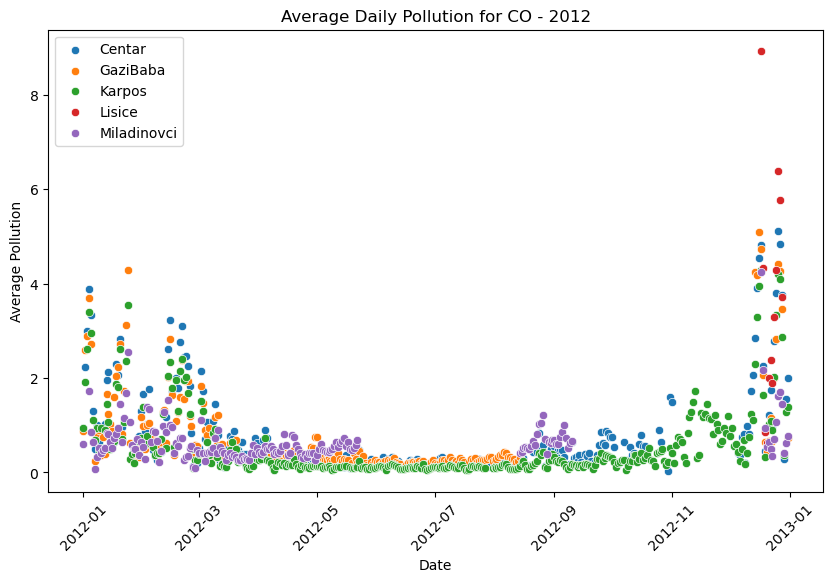

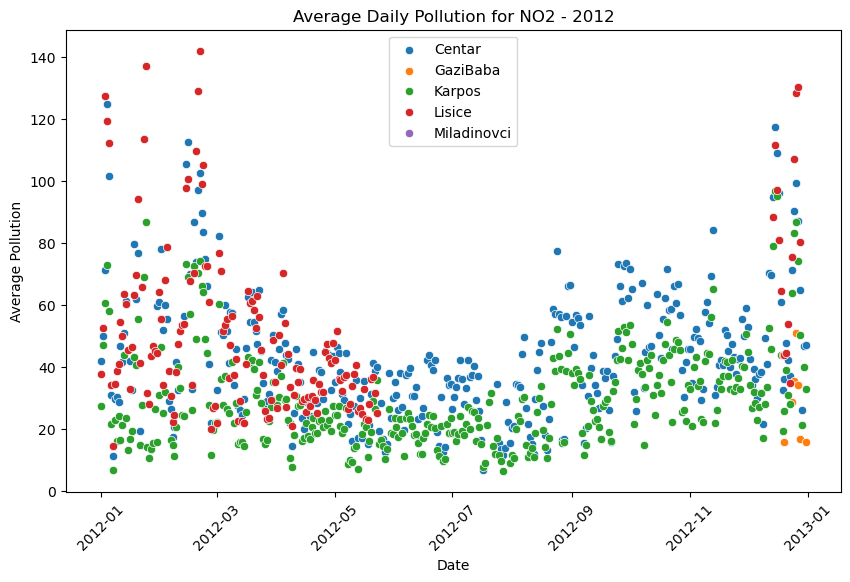

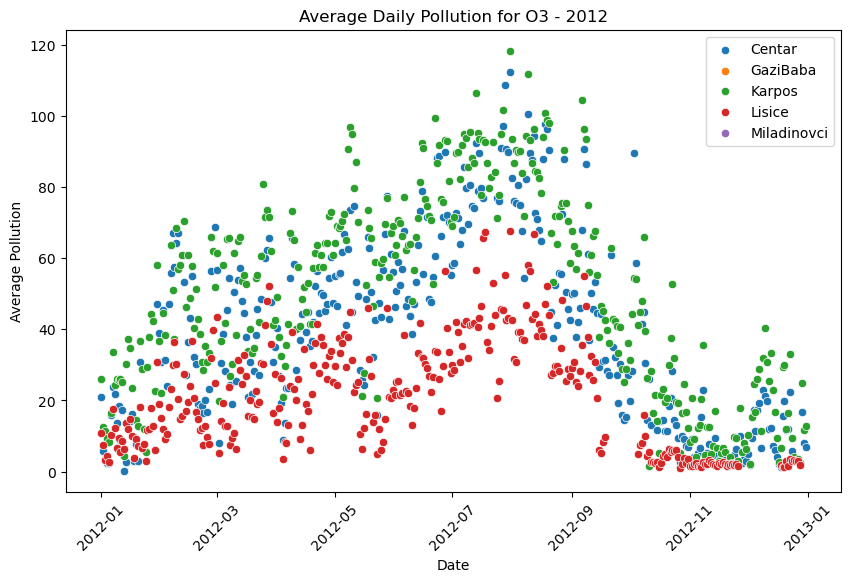

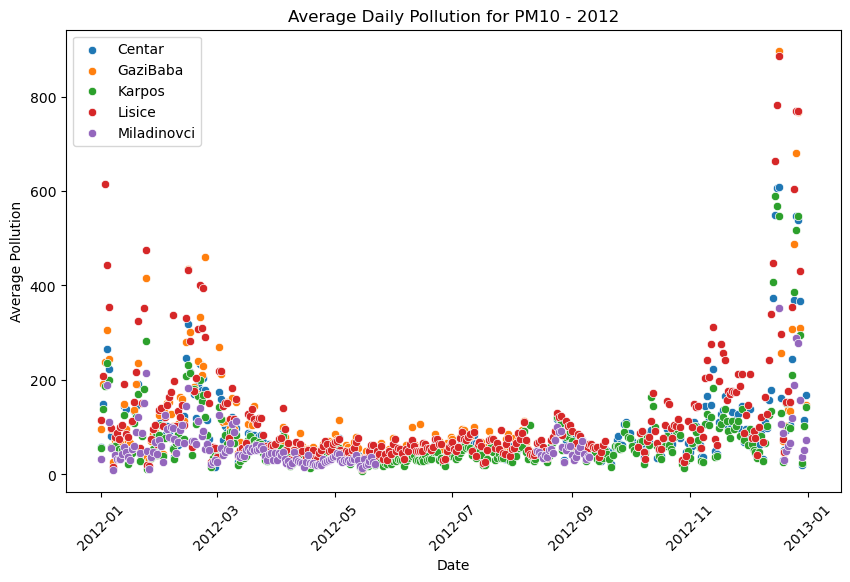

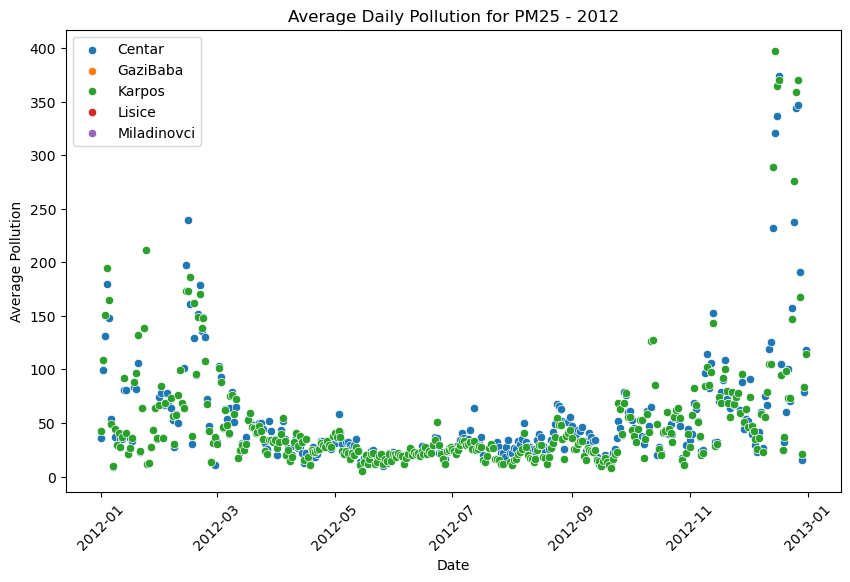

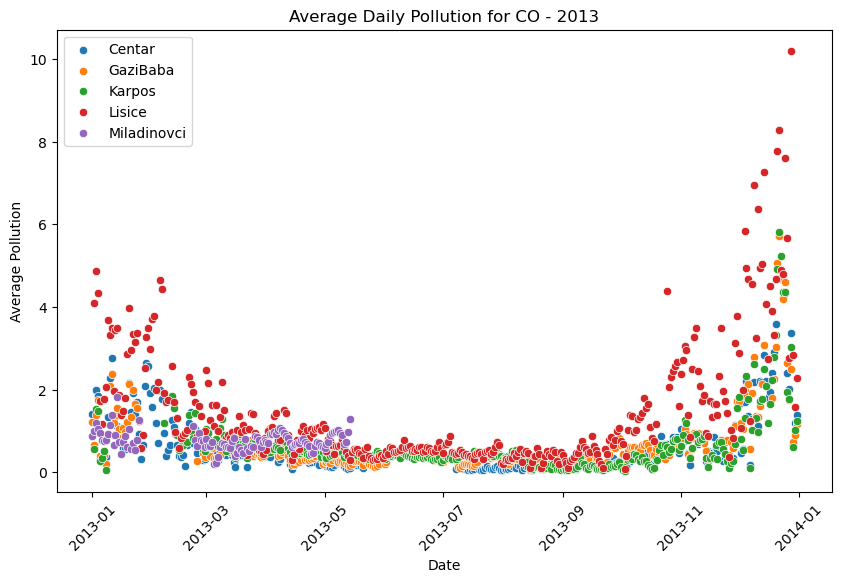

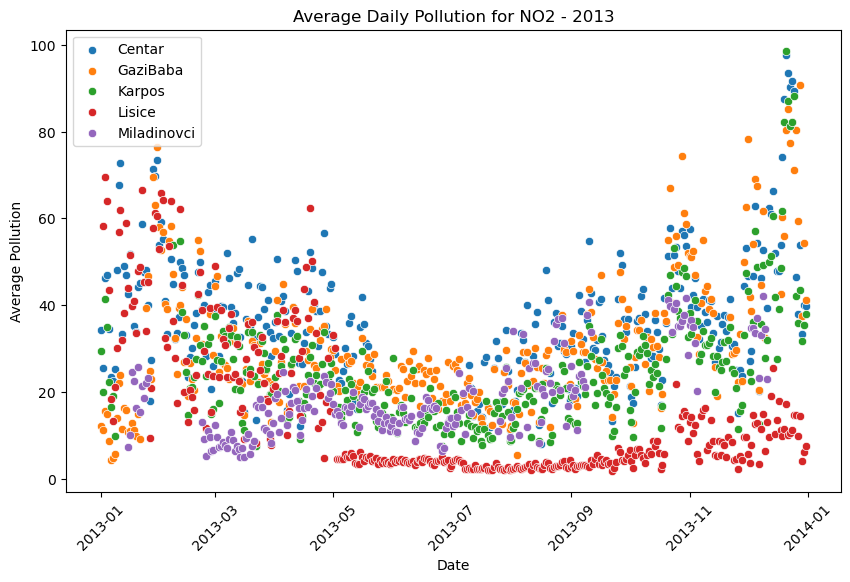

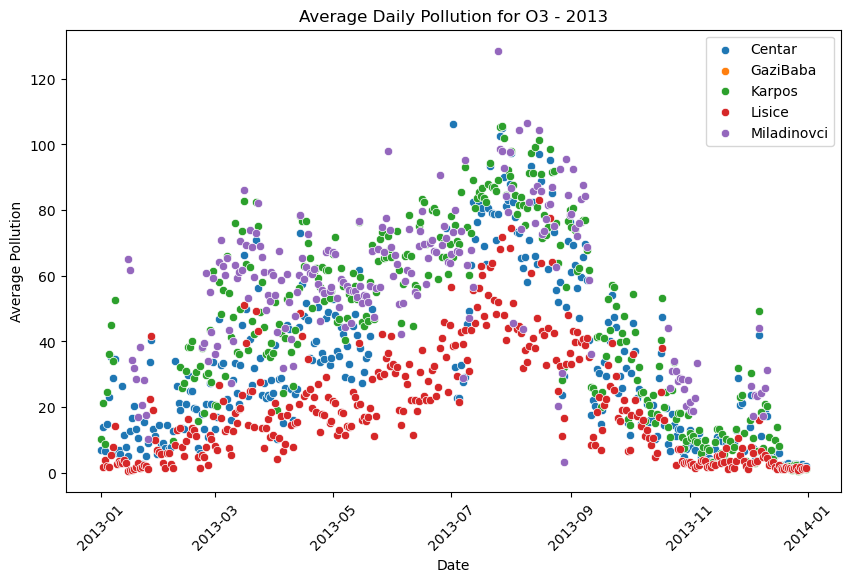

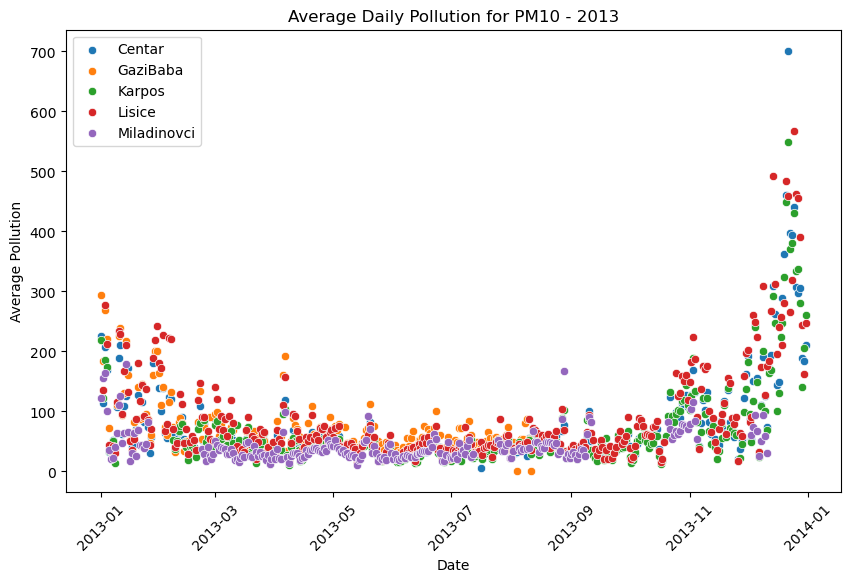

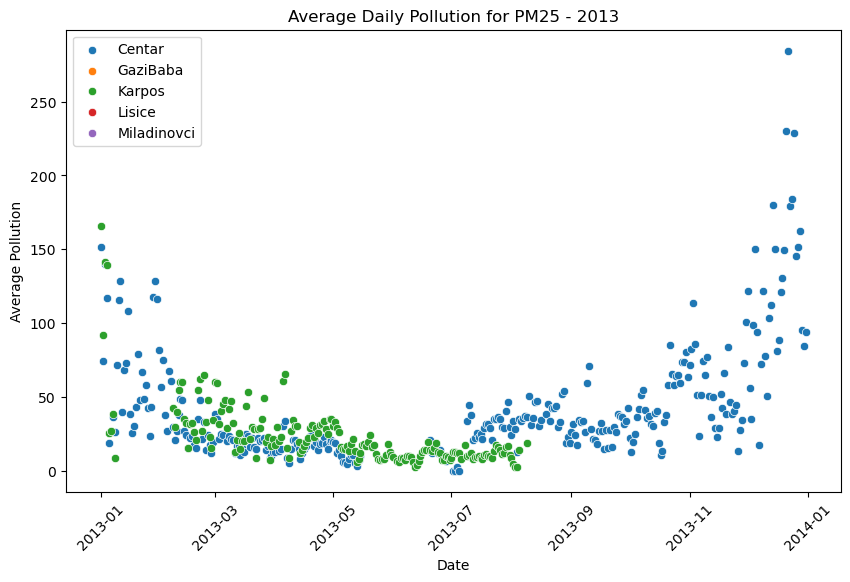

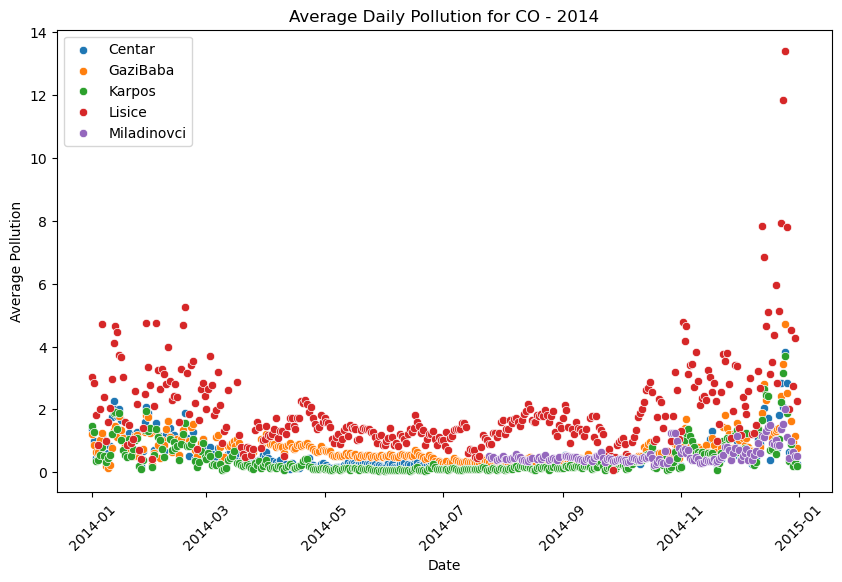

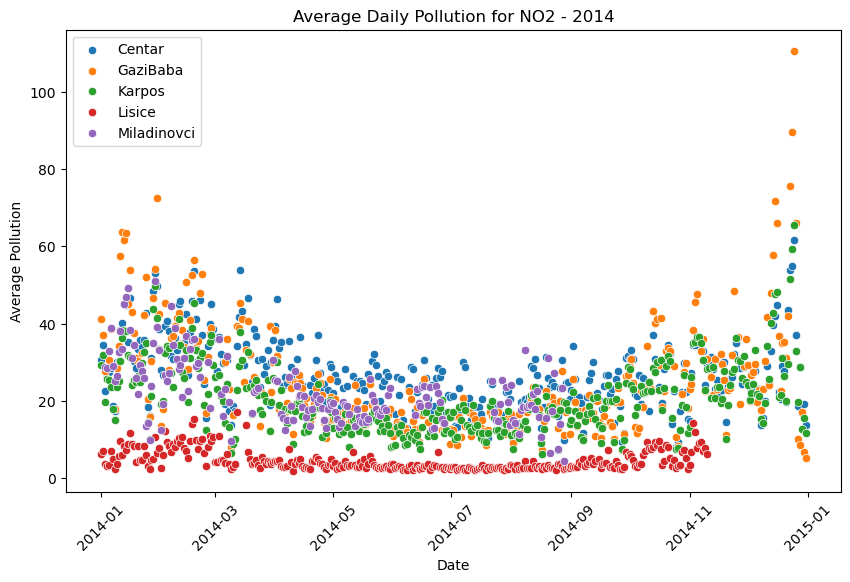

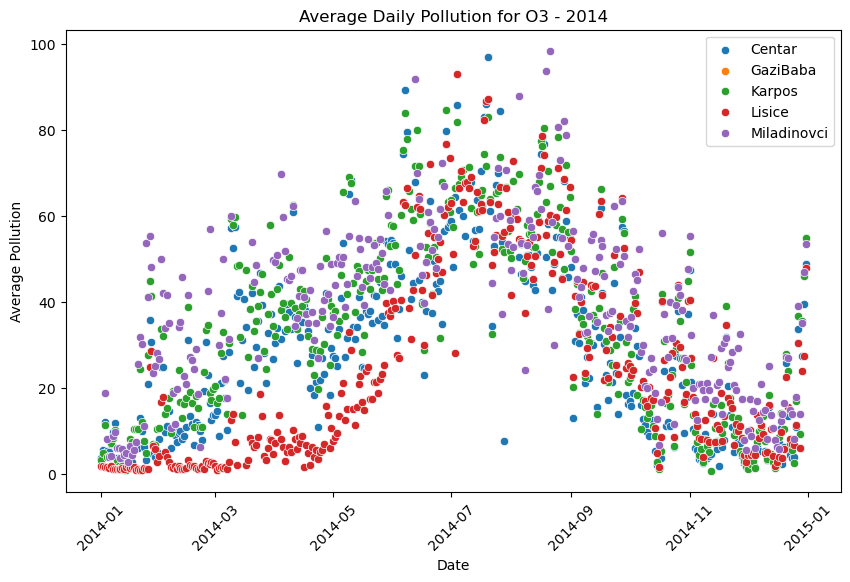

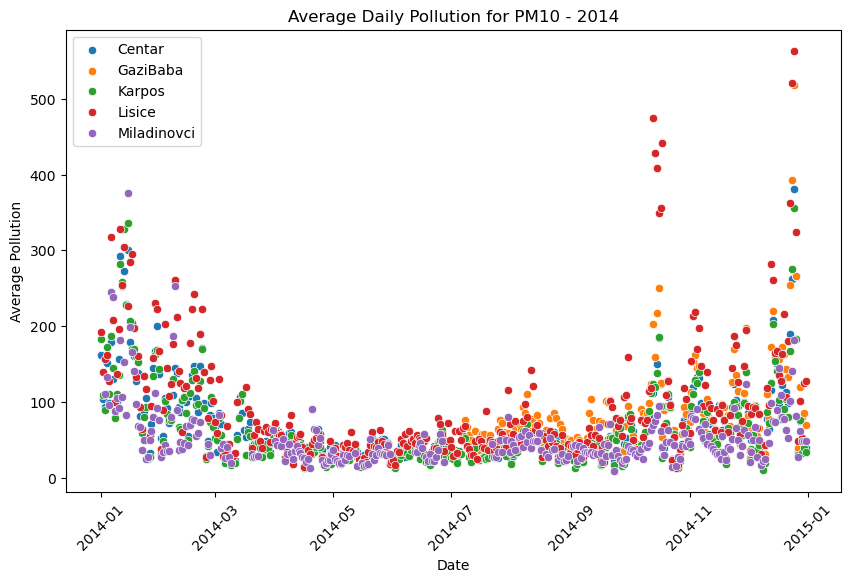

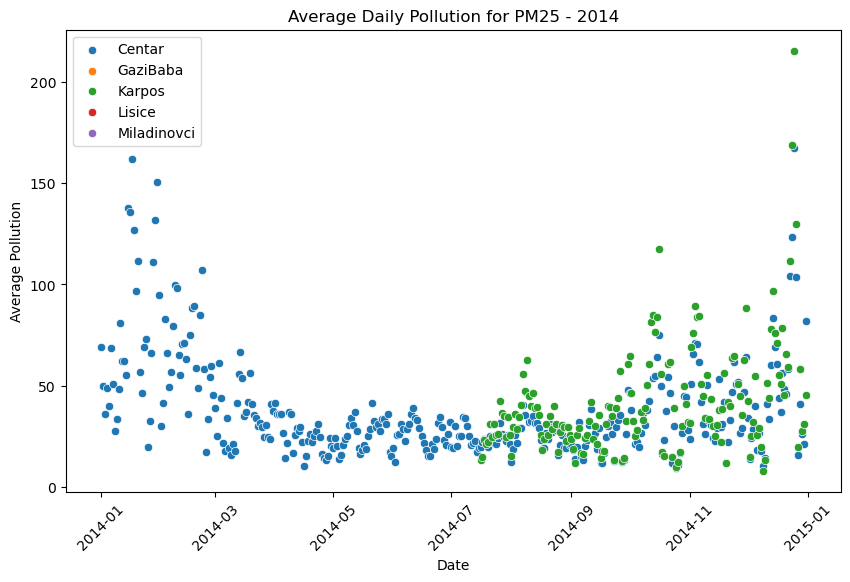

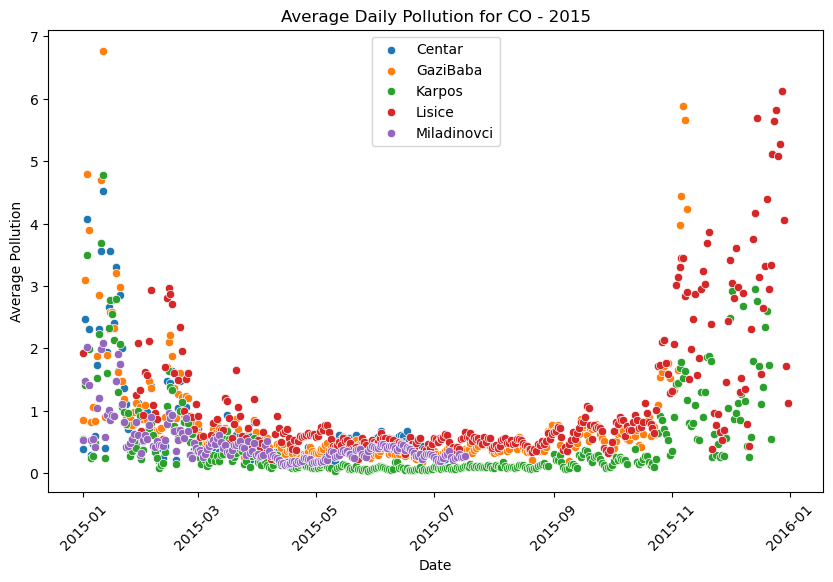

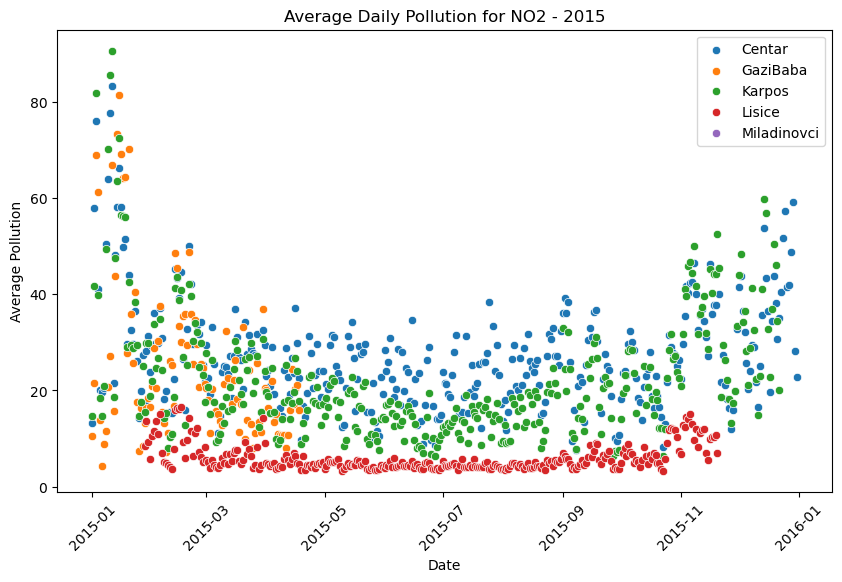

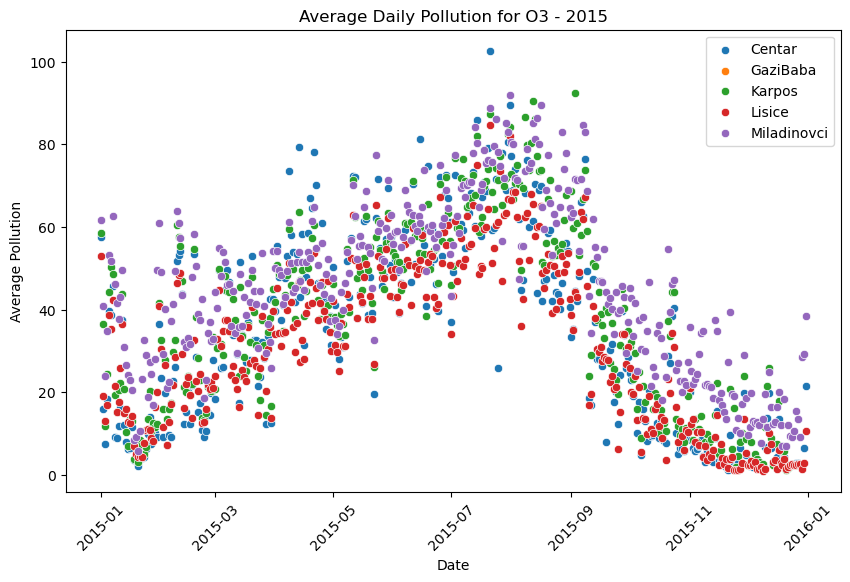

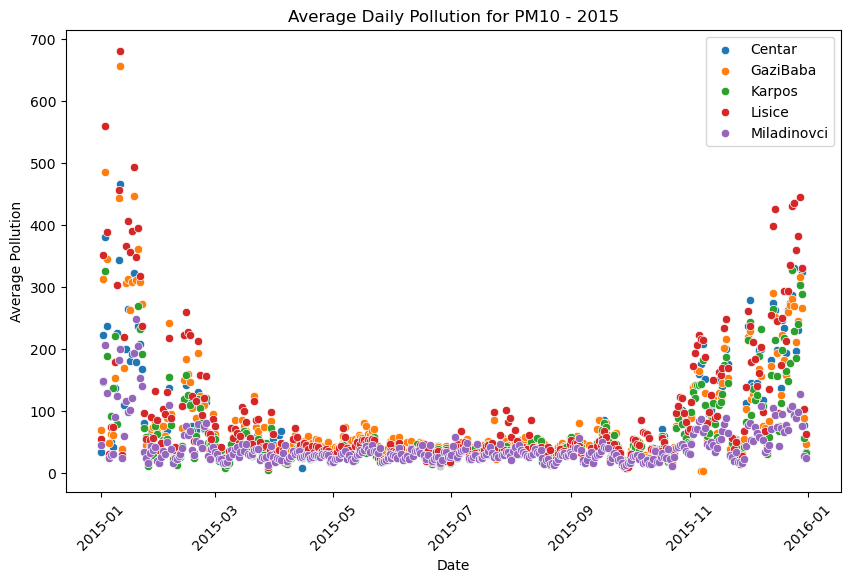

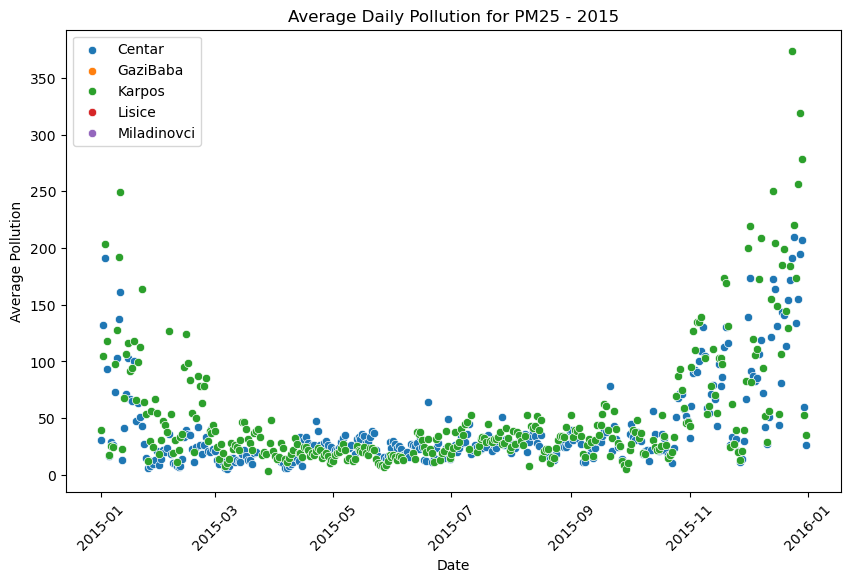

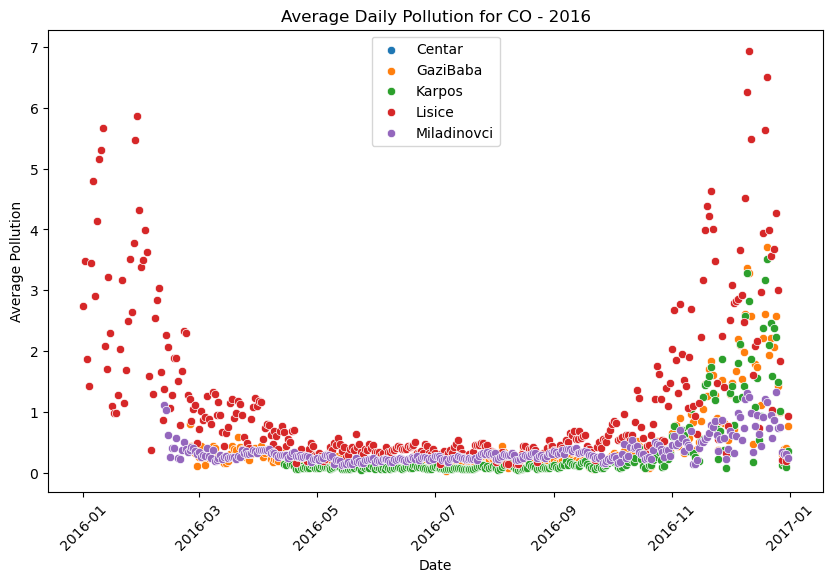

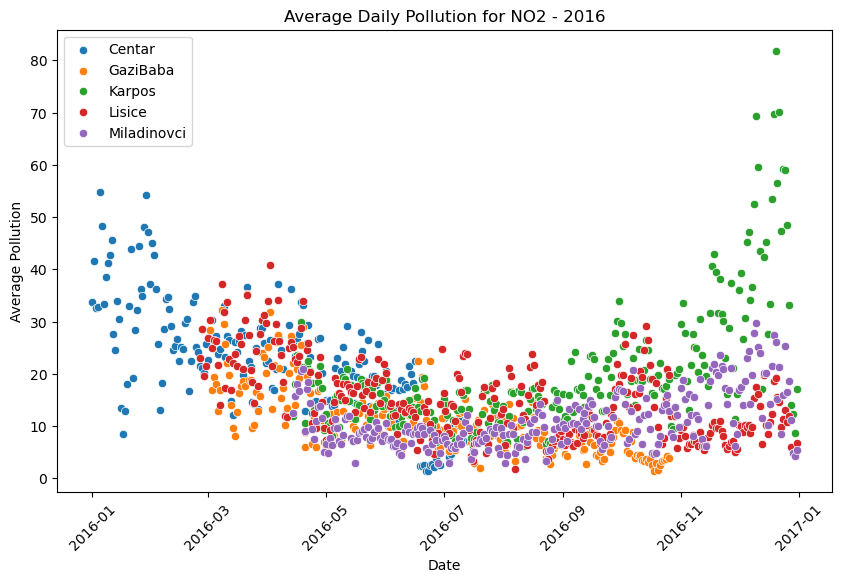

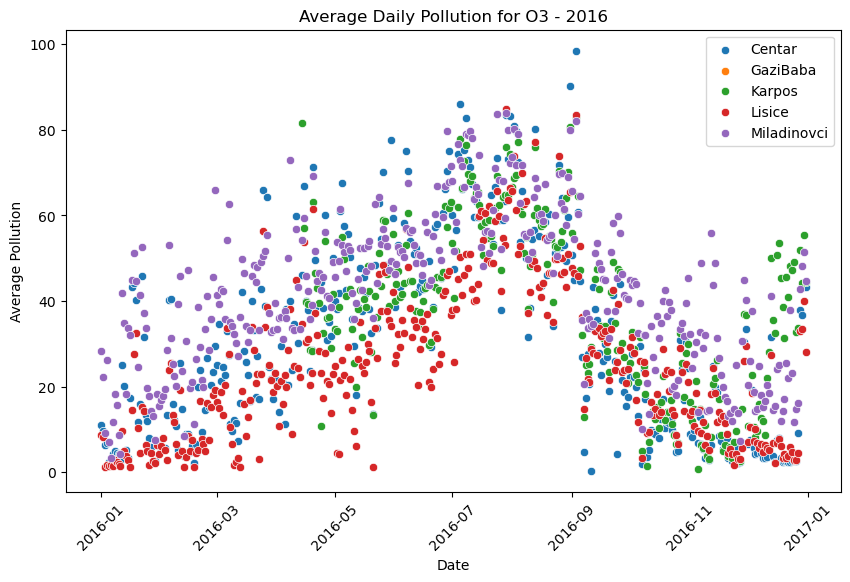

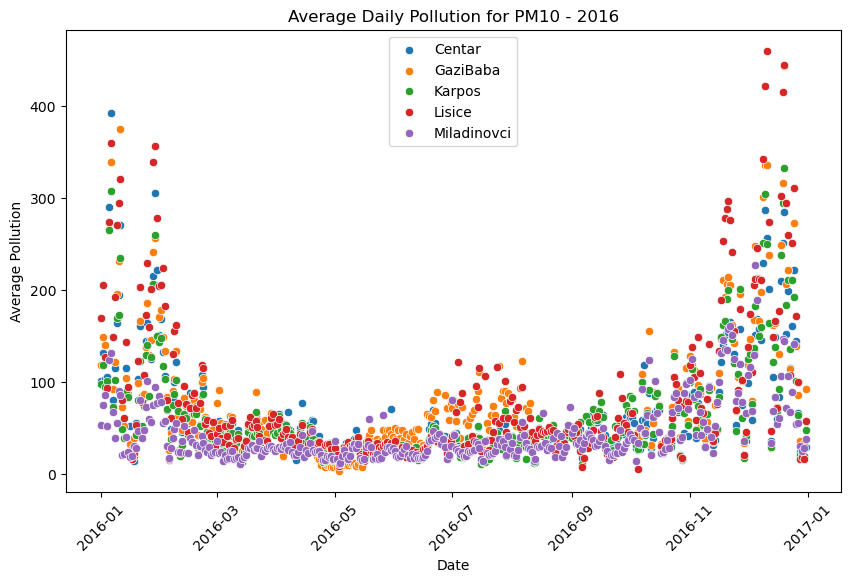

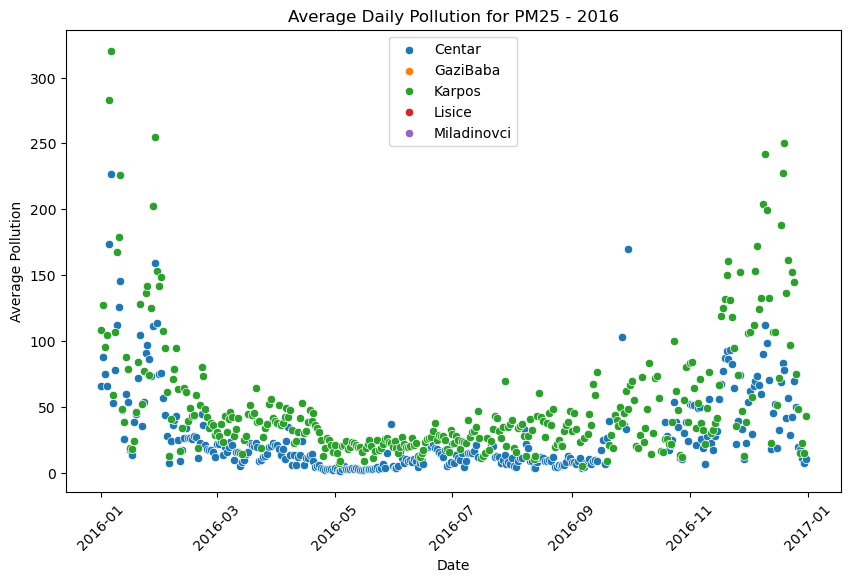

In [31]:
# Group by Date, Pollutant, and Year
df['Year'] = pd.to_datetime(df['Date']).dt.year
average_pollution_by_day = df.groupby(['Date', 'Pollutant', 'Year'])[locations].mean().reset_index()

# Iterate over each year and each pollutant to create separate scatter plots
for year in average_pollution_by_day['Year'].unique():
    year_data = average_pollution_by_day[average_pollution_by_day['Year'] == year]
    
    for pollutant in pollutants:
        pollutant_data = year_data[year_data['Pollutant'] == pollutant]
        
        plt.figure(figsize=(10, 6))
        for location in locations:
            sns.scatterplot(data=pollutant_data, x='Date', y=location, label=location)
        
        plt.xlabel('Date')
        plt.ylabel('Average Pollution')
        plt.title(f'Average Daily Pollution for {pollutant} - {year}')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

#  Average daily pollution accross locations on separate plots for each of the pollutants and for each year

In [32]:
# From all these graphs, it can be observed that the highest pollution levels occur in December, January, and February,
# except for the ozone particle which is generally most prevalent throughout the remaining months of the year, especially in August.

## Questions 6
If the range of values for PM10 considered safe and unsafe is according to the following scale:

Good                                    0-50

Moderate 	                            51-154

Unhealthy for sensitive individuals 	155-254

Unhealthy 	                            255-354

Very unhealthy                          355-424

Hazardous                               425-504

On how many days in each year, was the average value of PM10 meauserd accross locations worse than moderate?  .......... (3 points)

In [33]:
pm10_data_hour = df[df['Pollutant'] == 'PM10']   # Filter the DataFrame for rows with pollutant "PM10"
#print(pm10_data)
pm10_data = pm10_data_hour.drop('Hour', axis=1) # I dont need the column 'Hour'
#print(pm10_data)
grouped_data = pm10_data.groupby([pm10_data['Year'], pm10_data['Date']])  # Group the data by year and date

#print(grouped_data)
average_pm10 = grouped_data.mean()  # Calculate the average value of PM10 for each group

worse_than_moderate = average_pm10 > 154  # Boolean values
#print(worse_than_moderate)
# Count the number of days in each year when the average PM10 value is worse than moderate

days_worse_than_moderate = worse_than_moderate.groupby(['Year']).sum()
print(days_worse_than_moderate) # by location, for each year we have sum of days on which the average PM10 value is worse than moderate

      Centar  GaziBaba  Karpos  Lisice  Miladinovci
Year                                               
2012      31        29      25      63            8
2013      33        14      24      55            4
2014      21        17      22      52            9
2015      40        44      28      61            6
2016      26        38      27      51            4


## Question 7


On how many days in each year, was the value of PM10 measured on at least one location worse than moderate? .......... (3 points)

In [34]:
pm10_data_hour = df[df['Pollutant'] == 'PM10']   # Filter the DataFrame for rows with pollutant "PM10"
#print(pm10_data)
pm10_data = pm10_data_hour.drop('Hour', axis=1) # I dont need the column 'Hour'
#print(pm10_data)
grouped_data = pm10_data.groupby([pm10_data['Year'], pm10_data['Date']])  # Group the data by year and date

#print(grouped_data)
average_pm10 = grouped_data.mean()  # Calculate the average value of PM10 for each group

worse_than_moderate = average_pm10 > 154  # Boolean values
#print(worse_than_moderate)
# Count the number of days in each year when the average PM10 value is worse than moderate

days_worse_than_moderate = worse_than_moderate.groupby(['Year']).sum()
#print(days_worse_than_moderate) # by location, for each year we have sum of days on which the average PM10 value is worse than moderate
location_data = days_worse_than_moderate['Karpos']
print('For each year we have sum of days on which the average PM10 value is worse than moderate, in this case - Karpos')
print(location_data) # for each year we have sum of days on which the average PM10 value is worse than moderate, in this case - Karpos

For each year we have sum of days on which the average PM10 value is worse than moderate, in this case - Karpos
Year
2012    25
2013    24
2014    22
2015    28
2016    27
Name: Karpos, dtype: int64


## Question 8
Make a bar plot showing the average number of days per year when the measured value for PM10 was worse than moderate on at least one location.  .......... (3 points)

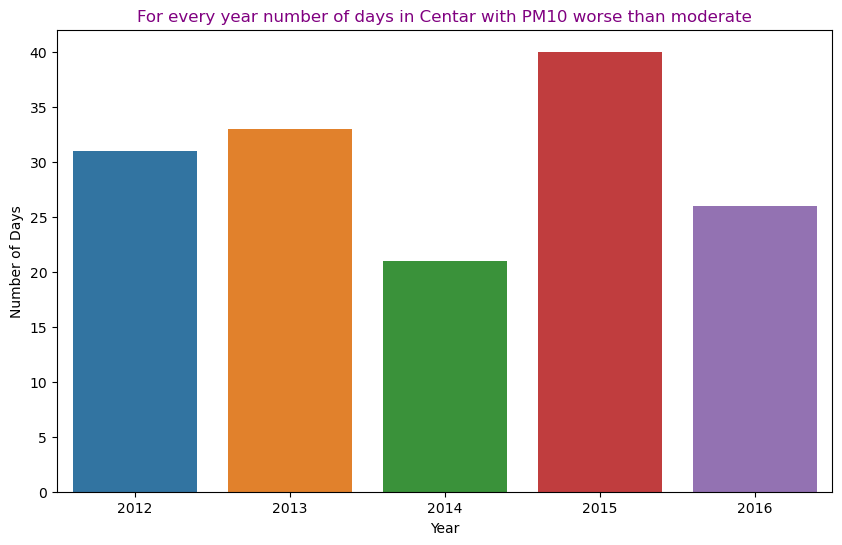

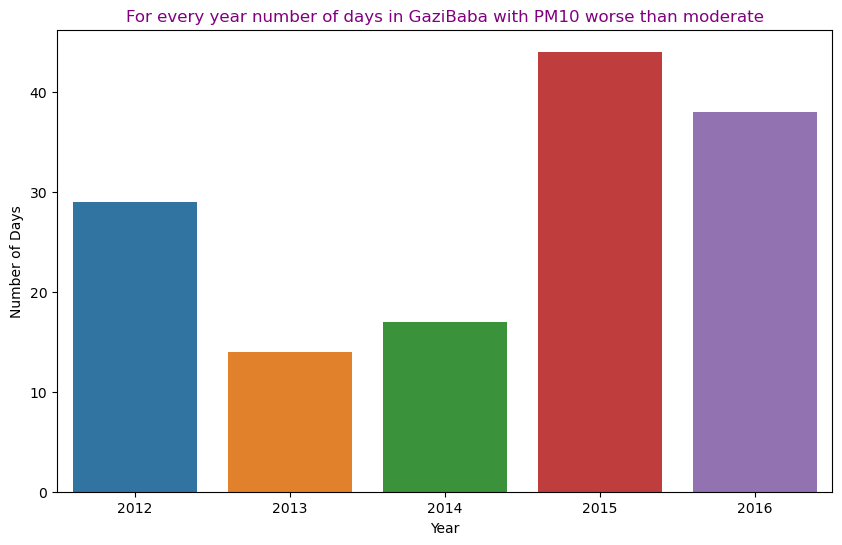

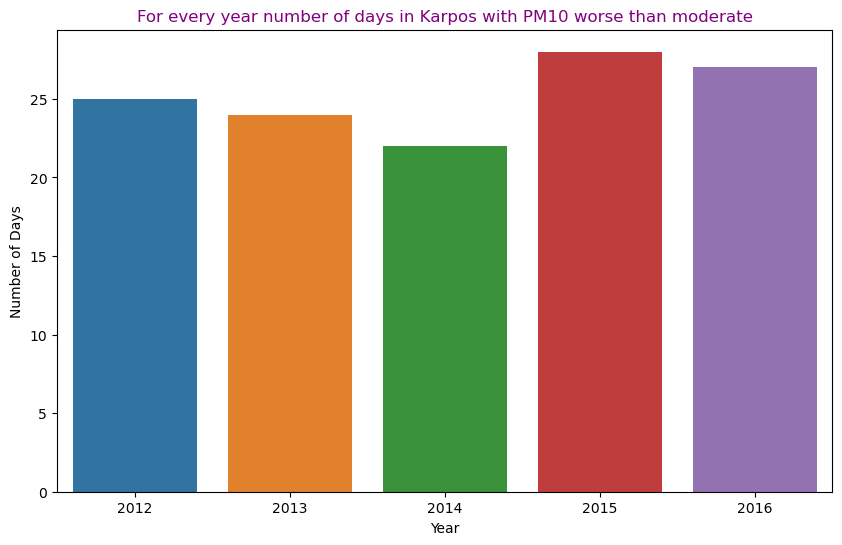

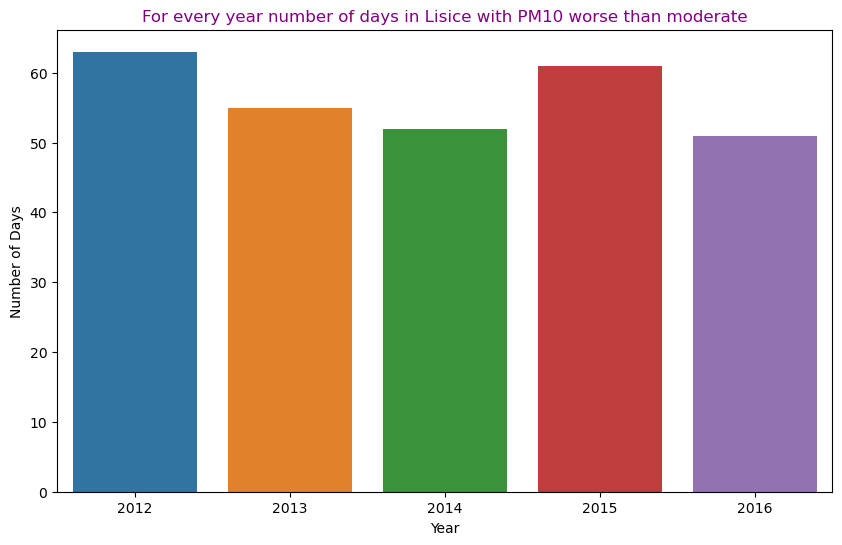

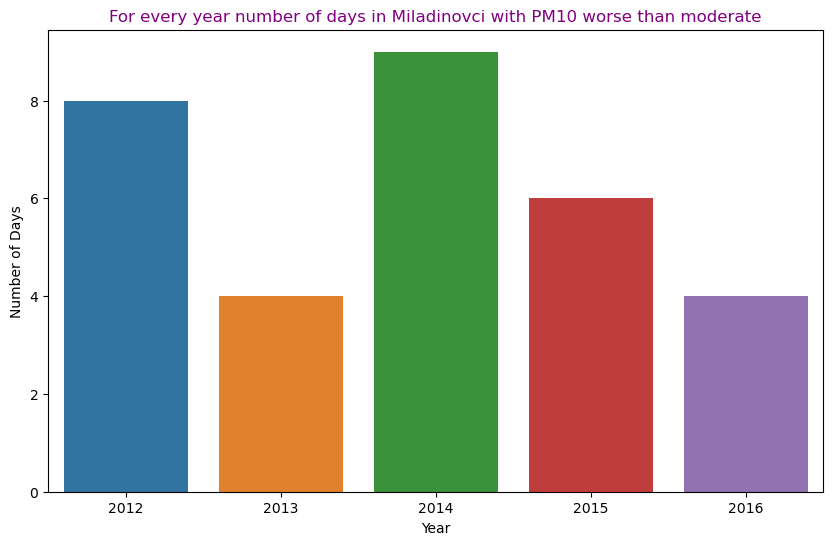

In [42]:
for location in locations:
    location_data = days_worse_than_moderate[location]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=location_data.index, y=location_data.values)
    
    plt.xlabel('Year')
    plt.ylabel('Number of Days')
    plt.title(f'For every year number of days in {location} with PM10 worse than moderate', color='purple')
    
    plt.show()
    
# Bar plots showing the average number of days per year when the measured value for 
# PM10 exceeded the moderate level for each location.
# The municipality of Lisice has the highest number of such days, with approximately 60 days on average per year. 
# On the other hand, the Miladinovtsi neighborhood has the lowest number of such days. 
# This can be attributed to the lower population density and industrial activities in Miladinovtsi. It is a common result,
# as pollution tends to be higher in the central areas compared to the outskirts or less densely populated areas.